Based on https://medium.com/@gpj/getting-started-with-weather-data-ba7749838549

# Reading in external data

In this worksheet, we'll learn how to read in **weather data** like temperature, precipitation, etc. The first thing you'll need to do is get a **token** from the National Oceanic and Atmospheric Administration (NOAA).

* Visit https://www.ncdc.noaa.gov/cdo-web/token and follow their instructions to obtain your token. Paste this in to the quotation marks in `token = ''` below.

Next, find a **weather station** you'd like to obatin data from. You can use one of the following options:

## Graphical Interface (looks nice, but doesn't always work).
* Visit https://www.ncdc.noaa.gov/cdo-web/datatools/findstation and search for a city. Select one of the stations that appear.
* Under Select Dataset, click on Daily Summaries.
* Click on the radio tower 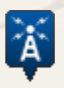 and copy its ID.
* Paste this ID into the quotation marks in `station_id = ''` below.

## Text database.
* Open https://www.ncei.noaa.gov/pub/data/ghcn/daily/ghcnd-stations.txt and search for a location (Ctrl+F, then type the city name).
* Copy the code from the left-hand column.
* Paste this ID into the quotation marks in `station_id = ''` below. Type `GHCND:` at the **beginning** of the code you copy and paste.


Then run this code cell.

In [ ]:
token = '' # Add your token to the ''.
station_id = 'GHCND:USW00013889'
# This is Jacksonville International Airport.
# I picked this location because I know it works!
# But you can change to another station if you want!
# You just need to CHECK for whether the station
# you choose has data for all the years you
# choose, and CHANGE yearI and yearF accordingly.

print('ready to go!')

Importing external datasets requires quite a few libraries. Run the code cell below so we can import everything we need.

In [ ]:
# Import all the Python libraries we need.
import requests
import pandas as pd
import json
import numpy as np
from datetime import datetime

There's a LOT of weather data you can read in! The code cell below reads in temperature (average, minimum, and maximum) and precipitation levels every day within the years `yearI` to `yearF`.

Run the code cell below. **There might be an error** if any of this data is missing. (NOAA isn't perfect...) If that happens, try adjusting your year range (`yearI` and `yearF`) until you find a range that works.

In [ ]:
# Read in the weather data we want.

# Set the initial and final years you want data from.
yearI = 2016 # Initial year.
yearF = 2020 # Final year.

# Initialize lists to store data
dates_temp = []
dates_prcp = []
temps = []
minT = []
maxT = []
prcp = []

# For each year from yearI to yearF ...
# We need the +1 after yearF because Python's range
# function stops short of the last value.
for year in range(yearI, yearF+1):
    year = str(year) # Turn integer year into text.
    print('working on year '+year) # Tell us where we are.

    # Make the api call to the necessary urls.
    url = 'https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GHCND&datatypeid=TAVG&datatypeid=TMAX&limit=1000'
    url = url + '&stationid=' + station_id
    url = url + '&startdate=' + year + '-01-01'
    url = url + '&enddate='   + year + '-12-31'
    r = requests.get(url, headers={'token':token})
    url = 'https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GHCND&datatypeid=TMIN&datatypeid=PRCP&limit=1000'
    url = url + '&stationid=' + station_id
    url = url + '&startdate=' + year + '-01-01'
    url = url + '&enddate='   + year + '-12-31'
    r2 = requests.get(url, headers={'token':token})

    # Load the api response as a json file.
    d = json.loads(r.text)
    d2 = json.loads(r2.text)

    # Organize the data by type..
    # Average temperature.
    avg_temps = [item for item in d['results'] if item['datatype']=='TAVG']
    # Minimum temperature.
    min_temps = [item for item in d2['results'] if item['datatype']=='TMIN']
    # Maximum temperature.
    max_temps = [item for item in d['results'] if item['datatype']=='TMAX']
    # Precipitation.
    precp = [item for item in d2['results'] if item['datatype']=='PRCP']
    # Dates.
    dates_temp += [item['date'] for item in avg_temps]

    # Get the actual average temperature from all average temperature readings.
    temps += [item['value'] for item in avg_temps]
    minT  += [item['value'] for item in min_temps]
    maxT  += [item['value'] for item in max_temps]
    prcp  += [item['value'] for item in precp]
print('finished')

# Go to https://www.ncdc.noaa.gov/cdo-web/datasets to find more datatypes available!

Now we'll compile all this data into a **database**. A database has columns that hold data (dates, temperatures, inches of rain) all correlated by date in rows. Run this code cell.

The `print(df_temp.head())` displays the first few rows of the database. What do you notice about it? Why might it be useful to examine some of the database directly before we proceed?

In [ ]:
# Initialize dataframe to hold data.
df_temp = pd.DataFrame()
print(len(temps),len(minT),len(maxT),len(prcp))
# Populate date and average temperature fields
# Change text date to datetime formate.
df_temp['date'] = [datetime.strptime(d, "%Y-%m-%dT%H:%M:%S") for d in dates_temp]
# Convert temperature from tenths of Celsius to Fahrenheit.
df_temp['avgTemp'] = [float(v)/10.0*1.8 + 32 for v in temps]
df_temp['minTemp'] = [float(v)/10.0*1.8 + 32 for v in minT]
df_temp['maxTemp'] = [float(v)/10.0*1.8 + 32 for v in maxT]
# Convert precipitation from mm/day to inch/day.
df_temp['prcp'] = [float(v)/25.54 for v in prcp]

# Show us what's at the top of the dataframe.
# This is a good way to check you got the
# data you expected!
print(df_temp.head())

# Graphs and Questions

To visualize the data, we need **graphs**. The code cell below will create **two graphs**: One of the maximum temperature versus date, and one of the minimum temperature versus date. Run this code cell.

* What do you notice about these graphs?
* What questions do you wonder after examining these graphs?

[double click to add your answers here]

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df_temp['date'],df_temp['maxTemp'])
plt.plot(df_temp['date'],df_temp['minTemp'])

When I examine temperature data for Jacksonville, I wonder how the range of temperature each day (maximum minus minimum) varies. You can answer this question by carrying out the following in the code cell below:

1. Calcualte the **temperature range** each day. You can do this in Python using `DeltaTemp = df_temp['maxTemp']-df_temp['minTemp']`.
2. Graph the temperature range versus time. You can do this in Pythong using `plt.plot(df_temp['date'],DeltaTemp)`.
3. Use `np.mean()`, `np.std()`, `np.min()`, and `np.max()` to examine the stats for these temperature ranges.

Now your turn: What informaiton do you need in order to answer your questions? Google search fo any Python functions that you need.

Now make a graph of the precipitation versus average temperature. Do you think there might be a relationship? What about with the maximum temperature? Minimum temperature? Temperature range? Try out each of these graphs and see if you can spy a relationship. If you think there might be, make a linear regression of these datasets like we did in Day 2. Was your hunch correct?